
#### Importing Libraries

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Enhancing Regression Models

Objectives, be able to use:

Pre-processing:
- handling non-numeric data
 - ordinal: label encoder
 - categorical: one-hot-encoder (which do you drop?)
 - binary encoder
- Scaling

Creating New:
- Interaction terms
- Polynomials
- combinations of other variables

Evaluating:
- R^2 vs adjusted R^2
- AIC
- BIC
- comparing model performance metrics - metrics going up or down?


## Scenario: car seat sales

Description: simulated data set on sales of car seats<br>
Format: 400 observations on the following 11 variables
- Sales: unit sales at each location
- CompPrice: price charged by nearest competitor at each location
- Income: community income level
- Advertising: local advertising budget for company at each location
- Population: population size in region (in thousands)
- Price: price charged for car seat at each site
- ShelveLoc: quality of shelving location at site (Good | Bad | Medium)
- Age: average age of the local population
- Education: education level at each location
- Urban: whether the store is in an urban or rural location
- USA: whether the store is in the US or not

 We will attempt to predict ${\tt Sales}$ (child car seat sales) in 400 locations based on a number of predictors.

#### Task
Before looking at the data, brainstorm with your neighbor which four variables you think *might* be related to sales.

In [2]:
df2 = pd.read_csv('Carseats.csv')
df2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


The ${\tt Carseats}$ data includes qualitative predictors such as ${\tt Shelveloc}$, an indicator of the quality of the shelving location—that is, the space within a store in which the car seat is displayed—at each location. The predictor ${\tt Shelveloc}$ takes on three possible values, ${\tt Bad}$, ${\tt Medium}$, and ${\tt Good}$.

Given a qualitative variable such as ${\tt Shelveloc}$, Python generates dummy variables automatically. Below we fit a multiple regression model that includes some interaction terms.

In [3]:
x_vars=list(df2.columns[df2.columns!='Sales'])

In [4]:
model = smf.ols('Sales ~ Income:Advertising+Price:Age + ' + "+".join(x_vars),data= df2)

In [5]:
results = model.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:                OLS              Adj. R-squared:     0.872    
Dependent Variable:   Sales            AIC:                1157.3378
Date:                 2019-08-29 14:46 BIC:                1213.2183
No. Observations:     400              Log-Likelihood:     -564.67  
Df Model:             13               F-statistic:        210.0    
Df Residuals:         386              Prob (F-statistic): 6.14e-166
R-squared:            0.876            Scale:              1.0213   
--------------------------------------------------------------------
                     Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------
Intercept            6.5756   1.0087   6.5185 0.0000  4.5922  8.5589
ShelveLoc[T.Good]    4.8487   0.1528  31.7243 0.0000  4.5482  5.1492
ShelveLoc[T.Medium]  1.9533   0.1258  15.5307 0.0000  1.7060  2.2005
Urban[T.Yes]         0.1402   0.1124   1.2470 0.2132 -0.0808  0.3612
US[T.Yes]           -0.1576   0.1489  -1.0580 0.2907 -0.4504  0.1352
Income:Advertising   0.0008   0.0003   2.6976 0.0073  0.0002  0.0013
Price:Age            0.0001   0.0001   0.8007 0.4238 -0.0002  0.0004
CompPrice            0.0929   0.0041  22.5668 0.0000  0.0848  0.1010
Income               0.0109   0.0026   4.1828 0.0000  0.0058  0.0160
Advertising          0.0702   0.0226   3.1070 0.0020  0.0258  0.1147
Population           0.0002   0.0004   0.4329 0.6653 -0.0006  0.0009
Price               -0.1008   0.0074 -13.5494 0.0000 -0.1154 -0.0862
Age                 -0.0579   0.0160  -3.6329 0.0003 -0.0893 -0.0266
Education           -0.0209   0.0196  -1.0632 0.2884 -0.0594  0.0177
--------------------------------------------------------------------
Omnibus:                1.281        Durbin-Watson:           2.047 
Prob(Omnibus):          0.527        Jarque-Bera (JB):        1.147 
Skew:                   0.129        Prob(JB):                0.564 
Kurtosis:               3.050        Condition No.:           130576
====================================================================
* The condition number is large (1e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

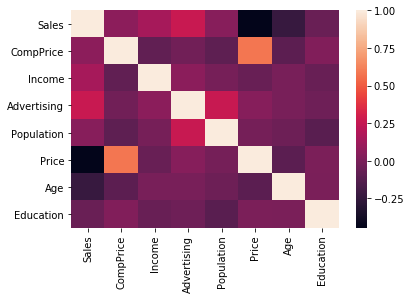

In [6]:
import seaborn as sns
import statsmodels.graphics.correlation as smf2
df2corr=df2.corr()
sns.heatmap(df2corr)

#### Task 
Again, with your neighbor:
- What issues do you see with this model?
- What would you change?

To learn how to set other coding schemes (or _contrasts_), see: http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/contrasts.html

### Polynomials

![polynomials](https://sc.cnbcfm.com/applications/cnbc.com/resources/files/2015/12/11/emotionandincome-01_0.png)

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

In [13]:
pre_obj_bin =LabelBinarizer()

In [15]:
pre_obj_bin.fit(df2['Urban'])

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [16]:
test = pre_obj_bin.fit_transform(df2.Urban)

In [11]:
from sklearn.preprocessing import PolynomialFeatures

`medv ~ lstat + np.square(lstat)`

In [12]:
from sklearn.preprocessing import StandardScaler

### Evaluating
#### Using `statsmodels`

![albon2](./img/aic-albon.png)

**AIC**: The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model.


**BIC**:	The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters.

Want to be lower. Lower is better.

`results.aic`<br>
`results.bic`

![r-sqared](https://qph.fs.quoracdn.net/main-qimg-b932057f732059158062cf0ad9c1719f.webp)

![adj-r-sqr](https://i.stack.imgur.com/BTGK6.png)

`results.rsquared()`<br>
`results.rsquared_adj()`
